In [13]:
import tifffile

# Ruta de la imagen TIFF C:\Users\lidices\Desktop\proyecto\codigos\image\UCLV\NIR
ruta_imagen1 = "dnir.tif"
ruta_imagen2 = "dred.tif"
ruta_imagen3 = "dgre.tif"
ruta_imagen4 = "dreg.tif"

# Carga la imagen TIFF
imagen1 = tifffile.imread(ruta_imagen1)
imagen2 = tifffile.imread(ruta_imagen2)
imagen3 = tifffile.imread(ruta_imagen3)
imagen4 = tifffile.imread(ruta_imagen4)

# Muestra información sobre la imagen
print("Dimensiones de la imagen:", imagen1.shape)
print("Tipo de datos de la imagen:", imagen1.dtype)

print("Dimensiones de la imagen:", imagen2.shape)
print("Tipo de datos de la imagen:", imagen2.dtype)

print("Dimensiones de la imagen:", imagen3.shape)
print("Tipo de datos de la imagen:", imagen3.dtype)

print("Dimensiones de la imagen:", imagen4.shape)
print("Tipo de datos de la imagen:", imagen4.dtype)

# Verifica la forma de la imagen
print("Forma de la imagen:", imagen1.shape)
print("Forma de la imagen:", imagen2.shape)
print("Forma de la imagen:", imagen3.shape)
print("Forma de la imagen:", imagen4.shape)

Dimensiones de la imagen: (2100, 2807)
Tipo de datos de la imagen: uint16
Dimensiones de la imagen: (2100, 2807)
Tipo de datos de la imagen: uint16
Dimensiones de la imagen: (2100, 2807)
Tipo de datos de la imagen: uint16
Dimensiones de la imagen: (2100, 2807)
Tipo de datos de la imagen: uint16
Forma de la imagen: (2100, 2807)
Forma de la imagen: (2100, 2807)
Forma de la imagen: (2100, 2807)
Forma de la imagen: (2100, 2807)


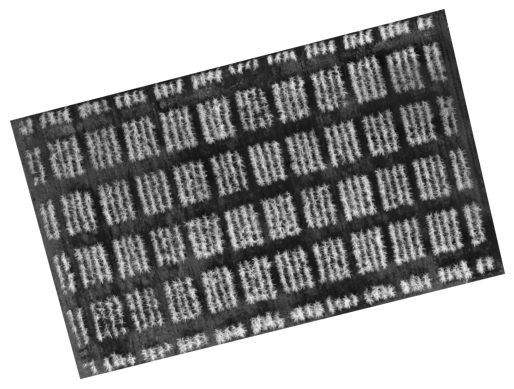

In [14]:
from PIL import Image
import matplotlib.pyplot as plt

# Cargar la imagen TIFF de 16 bits
image = Image.open("dnir.tif")

# Mostrar la imagen
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

# VI


In [15]:
# Definir las longitudes de onda correspondientes a cada banda
red_wavelength = 660
nir_wavelength = 840
gre_wavelength = 550
reg_wavelength = 735

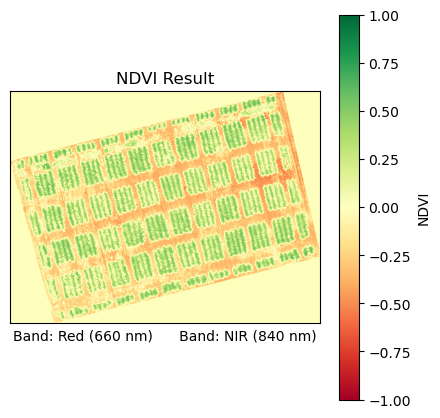

In [16]:
import numpy as np
from PIL import Image

# Cargar las imágenes
red_band_path = "dred.tif"
nir_band_path = "dnir.tif"

# Abrir las imágenes con PIL
red_band_img = Image.open(red_band_path)
nir_band_img = Image.open(nir_band_path)

# Convertir las imágenes a arreglos numpy
red_band = np.array(red_band_img)
nir_band = np.array(nir_band_img)

# Convertir los datos a tipo de datos de punto flotante (float)
red_band = red_band.astype(float)
nir_band = nir_band.astype(float)

# Calcular el NDVI
ndvi = (nir_band - red_band) / (nir_band + red_band)

# Guardar el resultado del NDVI en un archivo
np.save('ndvi_result.npy', ndvi)

# Escalar el NDVI al rango uint16
ndvi_scaled = np.interp(ndvi, (-1, 1), (0, 65535)).astype(np.uint16)

# Guardar el resultado del NDVI en un archivo TIFF
tifffile.imsave('ndvi_result.tif', ndvi_scaled)


# Graficar el NDVI
plt.figure(figsize=(5, 5))
plt.imshow(ndvi, cmap='RdYlGn', vmin=-1, vmax=1)
plt.colorbar(label='NDVI')
plt.title('NDVI Result')

# Agregar las etiquetas de las longitudes de onda
plt.xticks([], [])
plt.yticks([], [])
plt.xlabel(f'Band: Red ({red_wavelength} nm)      Band: NIR ({nir_wavelength} nm)')

plt.show()

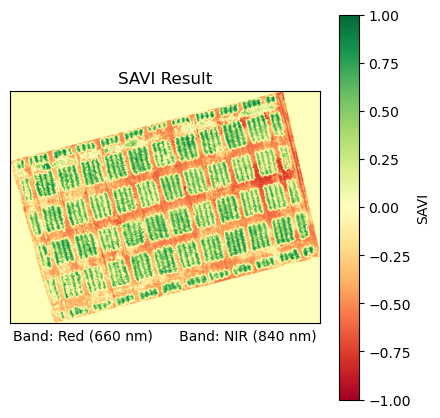

In [18]:
import numpy as np
import matplotlib.pyplot as plt

nir_band = np.array(Image.open(nir_band_path))
red_band = np.array(Image.open(red_band_path))

# Convertir los datos a tipo de datos de punto flotante (float)
nir_band = nir_band.astype(float)
red_band = red_band.astype(float)

# Calcular el Índice SAVI
L = 0.5
savi = ((nir_band - red_band) / (nir_band + red_band + L)) * (1 + L)

# Guardar el resultado del SAVI en un archivo
np.save('savi_result.npy', savi)

# Escalar el NDVI al rango uint16
savi_scaled = np.interp(savi, (-1, 1), (0, 65535)).astype(np.uint16)

# Guardar el resultado del NDVI en un archivo TIFF
tifffile.imsave('savi_result.tif', savi_scaled)

# Mostrar el resultado
plt.figure(figsize=(5, 5))
plt.imshow(savi, cmap='RdYlGn', vmin=-1, vmax=1)
plt.colorbar(label='SAVI')
plt.title('SAVI Result')

# Agregar las etiquetas de las longitudes de onda
plt.xticks([], [])
plt.yticks([], [])
plt.xlabel(f'Band: Red ({red_wavelength} nm)      Band: NIR ({nir_wavelength} nm)')

plt.show()


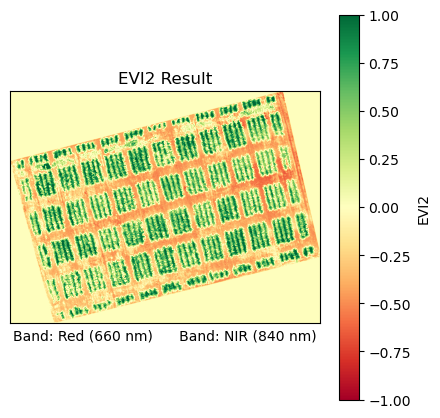

In [19]:
import numpy as np
import matplotlib.pyplot as plt

nir_band = np.array(Image.open(nir_band_path))
red_band = np.array(Image.open(red_band_path))

# Convertir los datos a tipo de datos de punto flotante (float)
nir_band = nir_band.astype(float)
red_band = red_band.astype(float)

# Calcular el Índice EVI2
evi2 = 2.5 * ((nir_band - red_band) / (nir_band + 2.4 * red_band + 1))

# Escalar el NDVI al rango uint16
evi2_scaled = np.interp(evi2, (-1, 1), (0, 65535)).astype(np.uint16)

# Guardar el resultado del NDVI en un archivo TIFF
tifffile.imsave('evi2_result.tif', evi2_scaled)

# Guardar el resultado del NDVI en un archivo
np.save('evi2_result.npy', evi2)

# Mostrar el resultado
plt.figure(figsize=(5, 5))
plt.imshow(evi2, cmap='RdYlGn', vmin=-1, vmax=1)
plt.colorbar(label='EVI2')
plt.title('EVI2 Result')

# Agregar las etiquetas de las longitudes de onda
plt.xticks([], [])
plt.yticks([], [])
plt.xlabel(f'Band: Red ({red_wavelength} nm)      Band: NIR ({nir_wavelength} nm)')

plt.show()


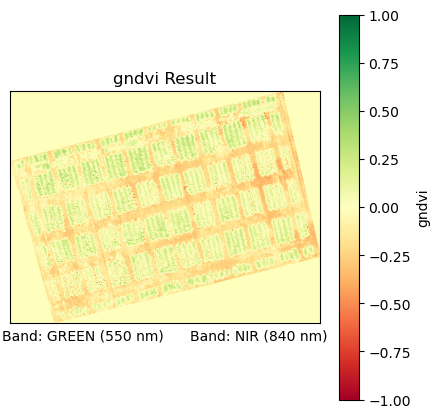

In [20]:
import numpy as np

# Cargar las imágenes de las bandas Verde e Infrarrojo Cercano
verde_band_path = "dgre.tif"
nir_band_path = "dnir.tif"

# Cargar las imágenes en arreglos numpy
verde_band = np.array(Image.open(verde_band_path))
nir_band = np.array(Image.open(nir_band_path))

# Convertir los datos a tipo de datos de punto flotante (float)
verde_band = verde_band.astype(float)
nir_band = nir_band.astype(float)

# Calcular el GNDVI
gndvi = (nir_band - verde_band) / (nir_band + verde_band)

# Escalar el NDVI al rango uint16
gndvi_scaled = np.interp(gndvi, (-1, 1), (0, 65535)).astype(np.uint16)


tifffile.imsave('gndvi_result.tif', gndvi_scaled)

# Guardar el resultado del GNDVI en un archivo
np.save('gndvi_result.npy', gndvi)

# Mostrar el resultado
plt.figure(figsize=(5, 5))
plt.imshow(gndvi, cmap='RdYlGn', vmin=-1, vmax=1)
plt.colorbar(label='gndvi')
plt.title('gndvi Result')

# Agregar las etiquetas de las longitudes de onda
plt.xticks([], [])
plt.yticks([], [])
plt.xlabel(f'Band: GREEN ({gre_wavelength} nm)      Band: NIR ({nir_wavelength} nm)')

plt.show()


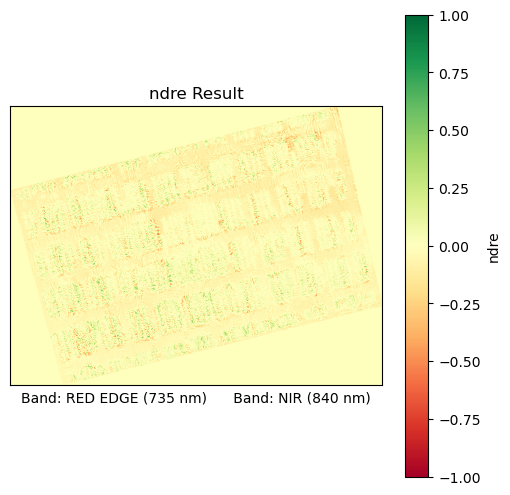

In [21]:
red_edge_band_path = r"dreg.tif"
nir_band_path = r"dnir.tif"

red_edge_band = np.array(Image.open(red_edge_band_path))
nir_band = np.array(Image.open(nir_band_path))

red_edge_band = red_edge_band.astype(float)
nir_band = nir_band.astype(float)

ndre = (nir_band - red_edge_band) / (nir_band + red_edge_band)

# Escalar el NDVI al rango uint16
ndre_scaled = np.interp(ndre, (-1, 1), (0, 65535)).astype(np.uint16)

# Guardar el resultado del NDVI en un archivo TIFF
tifffile.imsave('ndre_result.tif', ndre_scaled)

# Guardar el resultado del NDVI en un archivo
np.save('ndre_result.npy', ndre)


# Mostrar el resultado
plt.figure(figsize=(6, 6))
plt.imshow(ndre, cmap='RdYlGn', vmin=-1, vmax=1)
plt.colorbar(label='ndre')
plt.title('ndre Result')

# Agregar las etiquetas de las longitudes de onda
plt.xticks([], [])
plt.yticks([], [])
plt.xlabel(f'Band: RED EDGE ({reg_wavelength} nm)      Band: NIR ({nir_wavelength} nm)')

plt.show()



# Segmentación NIR y Máscara NDVI

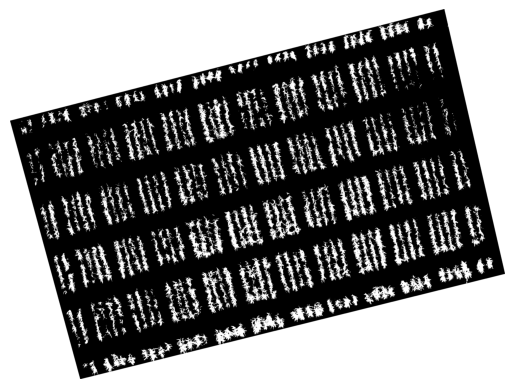

In [22]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Leer la imagen
ruta_imagen = "dnir.tif"
imagen = cv2.imread(ruta_imagen, cv2.IMREAD_UNCHANGED)

# Aplicar el método de Otsu
_, nir_binary = cv2.threshold(imagen, 0, 65535, cv2.THRESH_BINARY + cv2.THRESH_OTSU)



# Guardar el resultado del NDVI en un archivo TIFF
tifffile.imsave('nir_binary_result.tif', nir_binary)

# Mostrar la imagen
plt.imshow(nir_binary, cmap='gray')
plt.axis('off')
plt.show()

In [23]:
import imageio

# Ruta de salida para guardar la imagen segmentada
output_path = r"J:\proyecto\codigos\segmented_imageOtsu1.tif"

# Guardar la imagen segmentada en formato TIFF
imageio.imwrite(output_path, nir_binary.astype(np.uint16), format='TIFF')

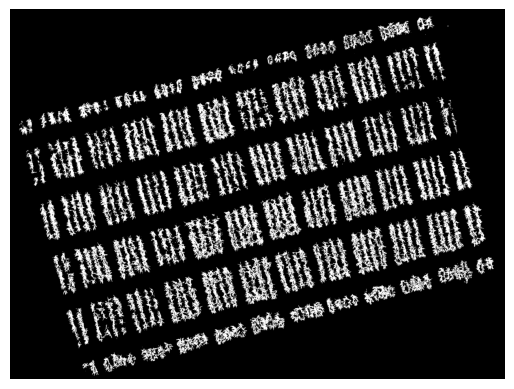

In [25]:
import numpy as np
from matplotlib.image import imread
from sklearn.cluster import KMeans

# Cargar la imagen
image = imread(r"dnir.tif")

# Obtener las dimensiones de la imagen
height, width = image.shape

# Reshape la imagen para tener una matriz de píxeles
pixels = image.reshape(-1, 1)

# Definir el número de clusters (2 en este caso para separar cultivo y suelo)
n_clusters = 4

# Aplicar K-Means para agrupar los píxeles
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=0)
kmeans.fit(pixels)

# Obtener las etiquetas de los clusters asignados a cada píxel
labels = kmeans.labels_

# Asignar etiquetas binarias (0 para cultivo y 65535 para suelo)
segmented_image = np.zeros_like(pixels, dtype=np.uint16)
cultivo_label = np.argmin(np.bincount(labels))  # Determinar la etiqueta del cultivo
segmented_image[labels == cultivo_label] = 65535  # Asignar 65535 a los píxeles del cultivo

# Reshape la imagen segmentada a las dimensiones originales
segmented_image = segmented_image.reshape(height, width)


# Guardar el resultado del NDVI en un archivo TIFF
tifffile.imsave('segmented_image_result2.tif', segmented_image)


# Mostrar la imagen segmentada
import matplotlib.pyplot as plt
plt.imshow(segmented_image, cmap='gray')
plt.axis('off')
plt.show()


# NDVI estresado

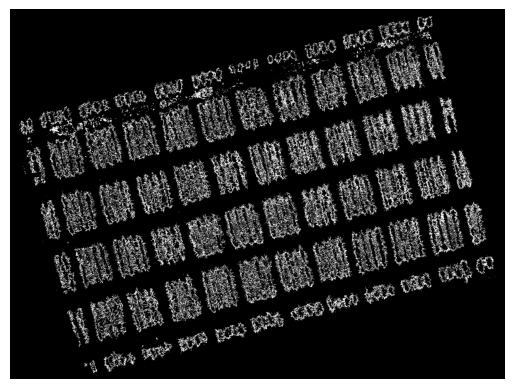

In [26]:

stress = np.where(np.logical_and(0.21 <= ndvi, ndvi < 0.39), 65535, 0)

# Escalar el NDVI al rango uint16
stress_scaled = np.interp(stress, (-1, 1), (0, 65535)).astype(np.uint16)

# Guardar el resultado del NDVI en un archivo TIFF
tifffile.imsave('stress_result.tif', stress_scaled)

# Mostrar la imagen
plt.imshow(stress, cmap='gray')
plt.axis('off')
plt.show()


# NDVI sano

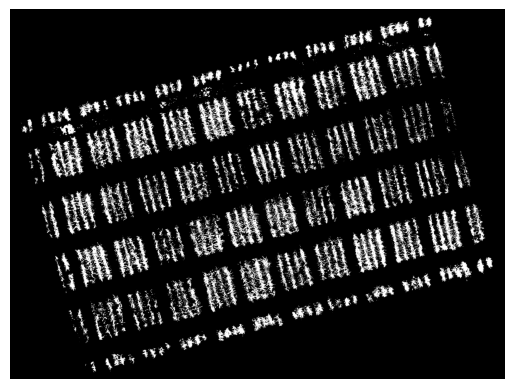

In [27]:
no_stress = np.where(ndvi >= 0.39, 65535, 0)

# Escalar el NDVI al rango uint16
no_stress_scaled = np.interp(stress, (-1, 1), (0, 65535)).astype(np.uint16)

# Guardar el resultado del NDVI en un archivo TIFF
tifffile.imsave('no_stress_result.tif', no_stress_scaled)

# Mostrar la imagen
plt.imshow(no_stress, cmap='gray')
plt.axis('off')
plt.show()


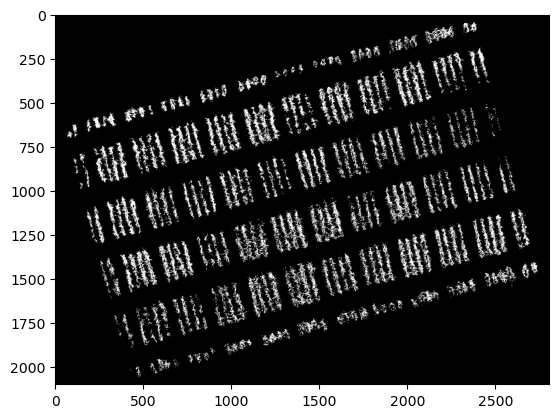

In [28]:
# LIMITACION DE INTERES DEL CULTIVO SALUDABLE
sano = np.where(np.logical_and(no_stress == 65535, segmented_image == 65535), 65535, 0)

# Guardar el resultado del NDVI en un archivo TIFF
tifffile.imsave('no_stress1.tif', sano)

plt.imshow(sano, cmap='gray')

plt.show() 



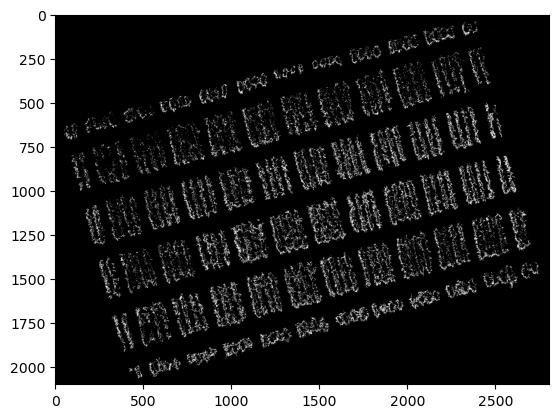

In [32]:
# LIMITACION DE INTERES DEL CULTIVO ESTRESADO
no_sano = np.where(np.logical_and( stress==65535, segmented_image==65535), 65535, 0)
plt.imshow(no_sano, cmap='gray')
plt.show()

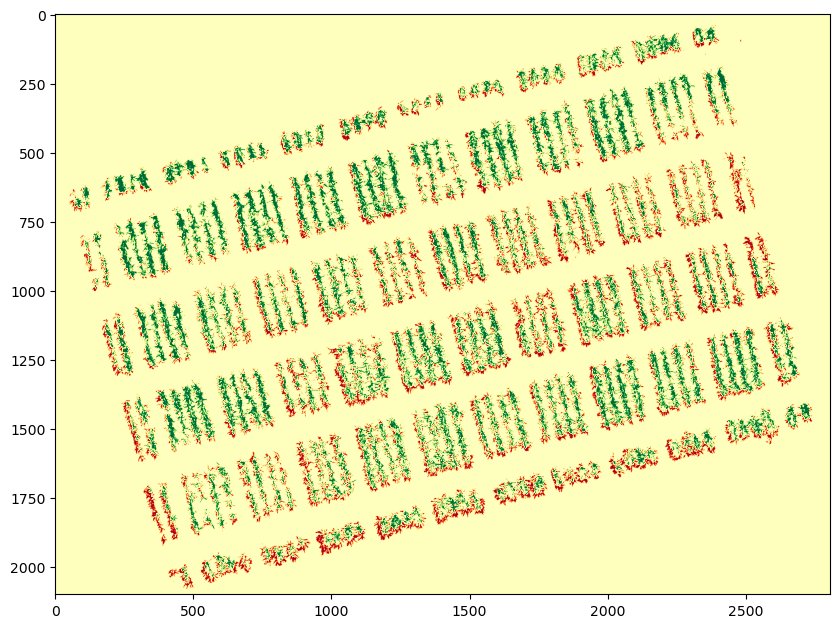

In [30]:
# Cargar la imagen en escala de grises
imagen_path = "dnir.tif"
imagen = cv2.imread(imagen_path, cv2.IMREAD_UNCHANGED)

# Obtener una máscara del fondo blanco
mascara = np.where(imagen == 65535, 0, imagen)

# LIMITACION DE INTERES DEL CULTIVO SALUDABLE
sano = np.where(np.logical_or(segmented_image != 65535, mascara == 0), 0,  np.where(ndvi >= 0.39, 1, -1)  )


# Guardar el resultado del NDVI en un archivo TIFF
tifffile.imsave('s_result.tif', sano)

# Graficar el NDVI
plt.figure(figsize=(10, 10))
plt.imshow(sano, cmap='RdYlGn')



In [8]:
import tifffile

# Ruta de la imagen TIFF C:\Users\lidices\Desktop\proyecto\codigos\image\UCLV\NIR
ruta_imagen1 = "segmented_imageKmeans.tif"


# Carga la imagen TIFF
imagen1 = tifffile.imread(ruta_imagen1)


# Muestra información sobre la imagen
print("Dimensiones de la imagen:", imagen1.shape)
print("Tipo de datos de la imagen:", imagen1.dtype)


# Verifica la forma de la imagen
print("Forma de la imagen:", imagen1.shape)


Dimensiones de la imagen: (2100, 2807)
Tipo de datos de la imagen: uint16
Forma de la imagen: (2100, 2807)


In [148]:
import numpy as np
from skimage.measure import label

def jaccard_similarity(image_pred, image_ref):
    # Etiquetar las regiones conectadas en las imágenes binarias
    labels_pred = label(image_pred)
    labels_ref = label(image_ref)
    
    # Calcular el número de regiones en cada imagen
    num_regions_pred = np.max(labels_pred)
    num_regions_ref = np.max(labels_ref)
    
    # Calcular la intersección entre las regiones segmentadas y las regiones de referencia
    intersection = np.sum((labels_pred > 0) & (labels_ref > 0))
    
    # Calcular la unión entre las regiones segmentadas y las regiones de referencia
    union = np.sum((labels_pred > 0) | (labels_ref > 0))
    
    # Calcular el coeficiente de similitud de Jaccard
    jaccard = intersection / union
    
    return jaccard

# Cargar las imágenes binarias
image_pred = imread("nir_binary_result.tif")
image_ref = imread("segmented_imageKmeans.tif")

# Calcular el coeficiente de similitud de Jaccard
jaccard_coefficient = jaccard_similarity(image_pred, image_ref)
print("Coeficiente de similitud de Jaccard:", jaccard_coefficient)


Coeficiente de similitud de Jaccard: 0.18257766964587557


In [151]:
import numpy as np
from PIL import Image

def jaccard_index(segmentation, ground_truth):
    intersection = np.logical_and(segmentation, ground_truth)
    union = np.logical_or(segmentation, ground_truth)
    return intersection.sum() / union.sum()

# Carga las imágenes TIFF
segmentation = Image.open('nir_binary_result.tif')
ground_truth = Image.open('segmented_imageKmeans.tif')

# Convierte las imágenes en matrices NumPy
segmentation_array = np.array(segmentation)
ground_truth_array = np.array(ground_truth)

# Calcula el índice Jaccard
jaccard = jaccard_index(segmentation_array, ground_truth_array)

print(jaccard)


0.18257766964587557


In [146]:
import numpy as np

# Calcular la matriz de confusión
confusion_matrix = np.zeros((2, 2))
for i in range(height):
    for j in range(width):
        if image_pred[i, j] == 65535 and image_ref[i, j] == 65535:
            confusion_matrix[0, 0] += 1  # Verdadero positivo
        elif image_pred[i, j] == 65535 and image_ref[i, j] == 0:
            confusion_matrix[1, 0] += 1  # Falso positivo
        elif image_pred[i, j] == 0 and image_ref[i, j] == 65535:
            confusion_matrix[0, 1] += 1  # Falso negativo

# Calcular la precisión y el recuerdo
precision = confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[1, 0])
recall = confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[0, 1])

print("Precisión: ", precision)
print("Recuerdo: ", recall)

Precisión:  0.41137142161430307
Recuerdo:  0.24714376922118436


In [149]:
import numpy as np
from skimage.io import imread

# Cargar las imágenes binarias
image1 = imread('segmented_imageKmeans.tif')
image2 = imread('nir_binary_result.tif')

# Verificar el tamaño y tipo de datos
assert image1.shape == image2.shape, "Las imágenes no tienen el mismo tamaño"
assert image1.dtype == image2.dtype, "Las imágenes no tienen el mismo tipo de datos"

# Calcular la diferencia entre las imágenes
difference = image1.astype(float) - image2.astype(float)

# Elevar al cuadrado las diferencias
squared_difference = np.square(difference)

# Calcular el promedio de las diferencias al cuadrado
mse = np.mean(squared_difference)

print("Error cuadrático medio (MSE):", mse)


Error cuadrático medio (MSE): 2193325290.280854


In [152]:
import rasterio
from sklearn.metrics import cohen_kappa_score

# Ruta de las imágenes TIFF
ruta_real = 'segmented_imageKmeans.tif'
ruta_predicha = 'nir_binary_result.tif'

# Leer las imágenes TIFF
with rasterio.open(ruta_real) as src_real, rasterio.open(ruta_predicha) as src_predicha:
    # Obtener los valores de píxeles de las imágenes
    img_real = src_real.read(1)
    img_predicha = src_predicha.read(1)

    # Aplanar las imágenes en matrices 1D
    y_true = img_real.flatten()
    y_pred = img_predicha.flatten()

# Calcular el coeficiente kappa
kappa = cohen_kappa_score(y_true, y_pred)

print("Coeficiente kappa:", kappa)


C:\Users\lidices\anaconda3\envs\li\lib\site-packages\rasterio\__init__.py:319: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


Coeficiente kappa: -0.05761610717840426


In [144]:
import numpy as np
import rasterio

# Rutas de los archivos de imágenes de los índices de vegetación
ndvi_path = "ndvi_result.tif"
ndwi_path = "savi_result.tif"
evi_path = "evi2_result.tif"
savi_path = "gndvi_result.tif"

# Abrir las imágenes con rasterio
with rasterio.open(ndvi_path) as ndvi_img, rasterio.open(ndwi_path) as ndwi_img, \
        rasterio.open(evi_path) as evi_img, rasterio.open(savi_path) as savi_img:
    # Leer los datos de las imágenes
    ndvi = ndvi_img.read(1).astype(np.float32)
    ndwi = ndwi_img.read(1).astype(np.float32)
    evi = evi_img.read(1).astype(np.float32)
    savi = savi_img.read(1).astype(np.float32)

# Calcular la correlación entre los índices de vegetación
correlation_matrix = np.corrcoef([ndvi.flatten(), ndwi.flatten(), evi.flatten(), savi.flatten()])

# Imprimir la matriz de correlación
print("Matriz de correlación:")
print(correlation_matrix)


Matriz de correlación:
[[1.         0.99998888 0.99297437 0.84598214]
 [0.99998888 1.         0.99301026 0.8458929 ]
 [0.99297437 0.99301026 1.         0.83003835]
 [0.84598214 0.8458929  0.83003835 1.        ]]


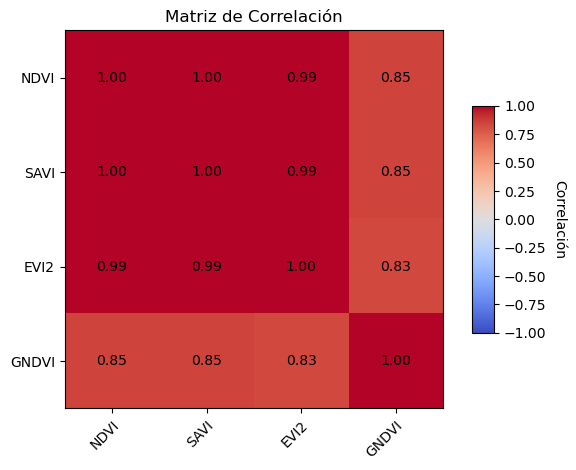

In [146]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt

# Rutas de los archivos de imágenes de los índices de vegetación
ndvi_path = "ndvi_result.tif"
savi_path = "savi_result.tif"
evi_path = "evi2_result.tif"
gndvi_path = "gndvi_result.tif"

# Abrir las imágenes con rasterio
with rasterio.open(ndvi_path) as ndvi_img, rasterio.open(savi_path) as savi_img, \
        rasterio.open(evi_path) as evi_img, rasterio.open(gndvi_path) as gndvi_img:
    # Leer los datos de las imágenes
    ndvi = ndvi_img.read(1).astype(np.float32)
    savi = savi_img.read(1).astype(np.float32)
    evi = evi_img.read(1).astype(np.float32)
    gndvi = gndvi_img.read(1).astype(np.float32)

# Calcular la correlación entre los índices de vegetación
correlation_matrix = np.corrcoef([ndvi.flatten(), savi.flatten(), evi.flatten(), gndvi.flatten()])

# Crear la figura y el eje
fig, ax = plt.subplots()

# Generar el gráfico de calor de la matriz de correlación
heatmap = ax.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)

# Configurar los ticks de los ejes
ax.set_xticks(np.arange(correlation_matrix.shape[1]))
ax.set_yticks(np.arange(correlation_matrix.shape[0]))
ax.set_xticklabels(['NDVI', 'SAVI', 'EVI2', 'GNDVI'])
ax.set_yticklabels(['NDVI', 'SAVI', 'EVI2', 'GNDVI'])

# Rotar las etiquetas de los ejes x e y
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Mostrar los valores de correlación en cada celda del gráfico
for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        ax.text(j, i, f"{correlation_matrix[i, j]:.2f}", ha="center", va="center", color="black")

# Agregar una barra de color
cbar = ax.figure.colorbar(heatmap, ax=ax, shrink=0.6, aspect=10)
cbar.ax.set_ylabel('Correlación', rotation=-90, va="bottom")

# Agregar un título al gráfico
ax.set_title('Matriz de Correlación')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


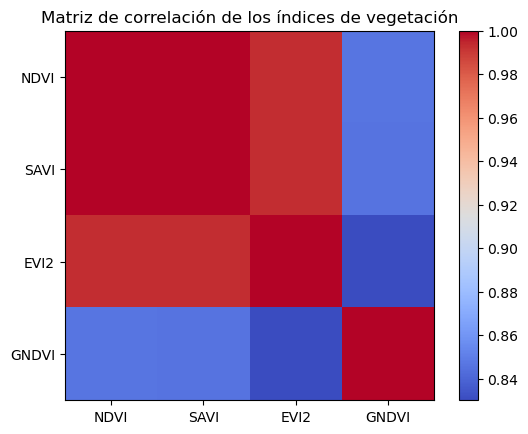

Matriz de correlación:
[[1.         0.99998888 0.99297437 0.84598214]
 [0.99998888 1.         0.99301026 0.8458929 ]
 [0.99297437 0.99301026 1.         0.83003835]
 [0.84598214 0.8458929  0.83003835 1.        ]]


In [147]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Cargar las imágenes de los índices de vegetación
ndvi_path = "ndvi_result.tif"
savi_path = "savi_result.tif"
evi2_path = "evi2_result.tif"
gndvi_path = "gndvi_result.tif"

ndvi_img = Image.open(ndvi_path)
savi_img = Image.open(savi_path)
evi2_img = Image.open(evi2_path)
gndvi_img = Image.open(gndvi_path)

# Convertir las imágenes a matrices numpy
ndvi = np.array(ndvi_img)
savi = np.array(savi_img)
evi2 = np.array(evi2_img)
gndvi = np.array(gndvi_img)

# Calcular la matriz de correlación
correlation_matrix = np.corrcoef([ndvi.flatten(), savi.flatten(), evi2.flatten(), gndvi.flatten()])

# Mostrar la matriz de correlación
plt.imshow(correlation_matrix, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(4), ['NDVI', 'SAVI', 'EVI2', 'GNDVI'])
plt.yticks(range(4), ['NDVI', 'SAVI', 'EVI2', 'GNDVI'])
plt.title('Matriz de correlación de los índices de vegetación')
plt.show()

# Imprimir la matriz de correlación
print("Matriz de correlación:")
print(correlation_matrix)


In [2]:
import numpy as np
import pandas as pd
import rasterio

# Cargar las imágenes de las bandas espectrales
nir_band_path = "dnir.tif"
red_band_path = "dred.tif"
green_band_path = "dgre.tif"
red_edge_band_path = "dreg.tif"

# Cargar los índices de vegetación
ndvi_path = "ndvi_result.tif"
savi_path = "savi_result.tif"
evi2_path = "evi2_result.tif"
ndre_path = "ndre_result.tif"
gndvi_path = "gndvi_result.tif"

# Leer los datos de las bandas espectrales
with rasterio.open(nir_band_path) as nir_band_img:
    nir_band = nir_band_img.read(1)

with rasterio.open(red_band_path) as red_band_img:
    red_band = red_band_img.read(1)

with rasterio.open(green_band_path) as green_band_img:
    green_band = green_band_img.read(1)

with rasterio.open(red_edge_band_path) as red_edge_band_img:
    red_edge_band = red_edge_band_img.read(1)

# Leer los datos de los índices de vegetación
with rasterio.open(ndvi_path) as ndvi_img:
    ndvi = ndvi_img.read(1)

with rasterio.open(savi_path) as savi_img:
    savi = savi_img.read(1)

with rasterio.open(evi2_path) as evi2_img:
    evi2 = evi2_img.read(1)

with rasterio.open(ndre_path) as ndre_img:
    ndre = ndre_img.read(1)

with rasterio.open(gndvi_path) as gndvi_img:
    gndvi = gndvi_img.read(1)

# Crear un DataFrame con las características
data = {
    'nir_band': nir_band.flatten(),
    'red_band': red_band.flatten(),
    'green_band': green_band.flatten(),
    'red_edge_band': red_edge_band.flatten(),
    'ndvi': ndvi.flatten(),
    'savi': savi.flatten(),
    'evi2': evi2.flatten(),
    'ndre': ndre.flatten(),
    'gndvi': gndvi.flatten()
}

df = pd.DataFrame(data)
# Guardar el DataFrame en un archivo CSV
df.to_csv('mi_dataframe.csv', index=False)

# Imprimir las primeras filas del DataFrame
print(df.head())


C:\Users\lidices\anaconda3\envs\li\lib\site-packages\rasterio\__init__.py:319: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


   nir_band  red_band  green_band  red_edge_band   ndvi   savi   evi2   ndre  \
0     65535     65535       65535          65535  32767  32767  32767  32767   
1     65535     65535       65535          65535  32767  32767  32767  32767   
2     65535     65535       65535          65535  32767  32767  32767  32767   
3     65535     65535       65535          65535  32767  32767  32767  32767   
4     65535     65535       65535          65535  32767  32767  32767  32767   

   gndvi  
0  32767  
1  32767  
2  32767  
3  32767  
4  32767  


In [16]:
import pandas as pd

# Cargar el DataFrame desde el archivo CSV
df = pd.read_csv('mi_dataframe1.csv')

# Mostrar las primeras filas del DataFrame
print(df.head())


   nir_band  red_band  green_band  red_edge_band   ndvi   savi   evi2   ndre  \
0         0         0           0              0  32767  32767  32767  32767   
1         0         0           0              0  32767  32767  32767  32767   
2         0         0           0              0  32767  32767  32767  32767   
3         0         0           0              0  32767  32767  32767  32767   
4         0         0           0              0  32767  32767  32767  32767   

   gndvi  
0  32767  
1  32767  
2  32767  
3  32767  
4  32767  


In [17]:
df.describe()


,nir_band,red_band,green_band,red_edge_band,ndvi,savi,evi2,ndre,gndvi
count,5.894700e+06,5.894700e+06,5.894700e+06,5.894700e+06,5.894700e+06,5.894700e+06,5.894700e+06,5.894700e+06,5.894700e+06
mean,1.521450e+04,1.243432e+04,1.502195e+04,1.589381e+04,3.337397e+04,3.361284e+04,3.313439e+04,3.212931e+04,3.179263e+04
std,1.582029e+04,1.038619e+04,1.326440e+04,1.607157e+04,8.188561e+03,1.228362e+04,1.309073e+04,4.187023e+03,5.519936e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.715000e+03,0.000000e+00,0.000000e+00,1.101000e+03,6.650000e+02
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.791500e+04,2.542100e+04,2.451800e+04,3.056800e+04,2.807600e+04
50%,1.117800e+04,1.431300e+04,1.534200e+04,1.225500e+04,3.276700e+04,3.276700e+04,3.276700e+04,3.276700e+04,3.276700e+04
75%,2.444200e+04,1.990000e+04,2.440500e+04,2.591600e+04,3.775200e+04,4.014500e+04,3.748700e+04,3.276700e+04,3.300200e+04
max,6.295400e+04,6.364800e+04,6.493100e+04,6.481700e+04,5.982000e+04,6.553400e+04,6.553400e+04,6.113400e+04,5.871200e+04


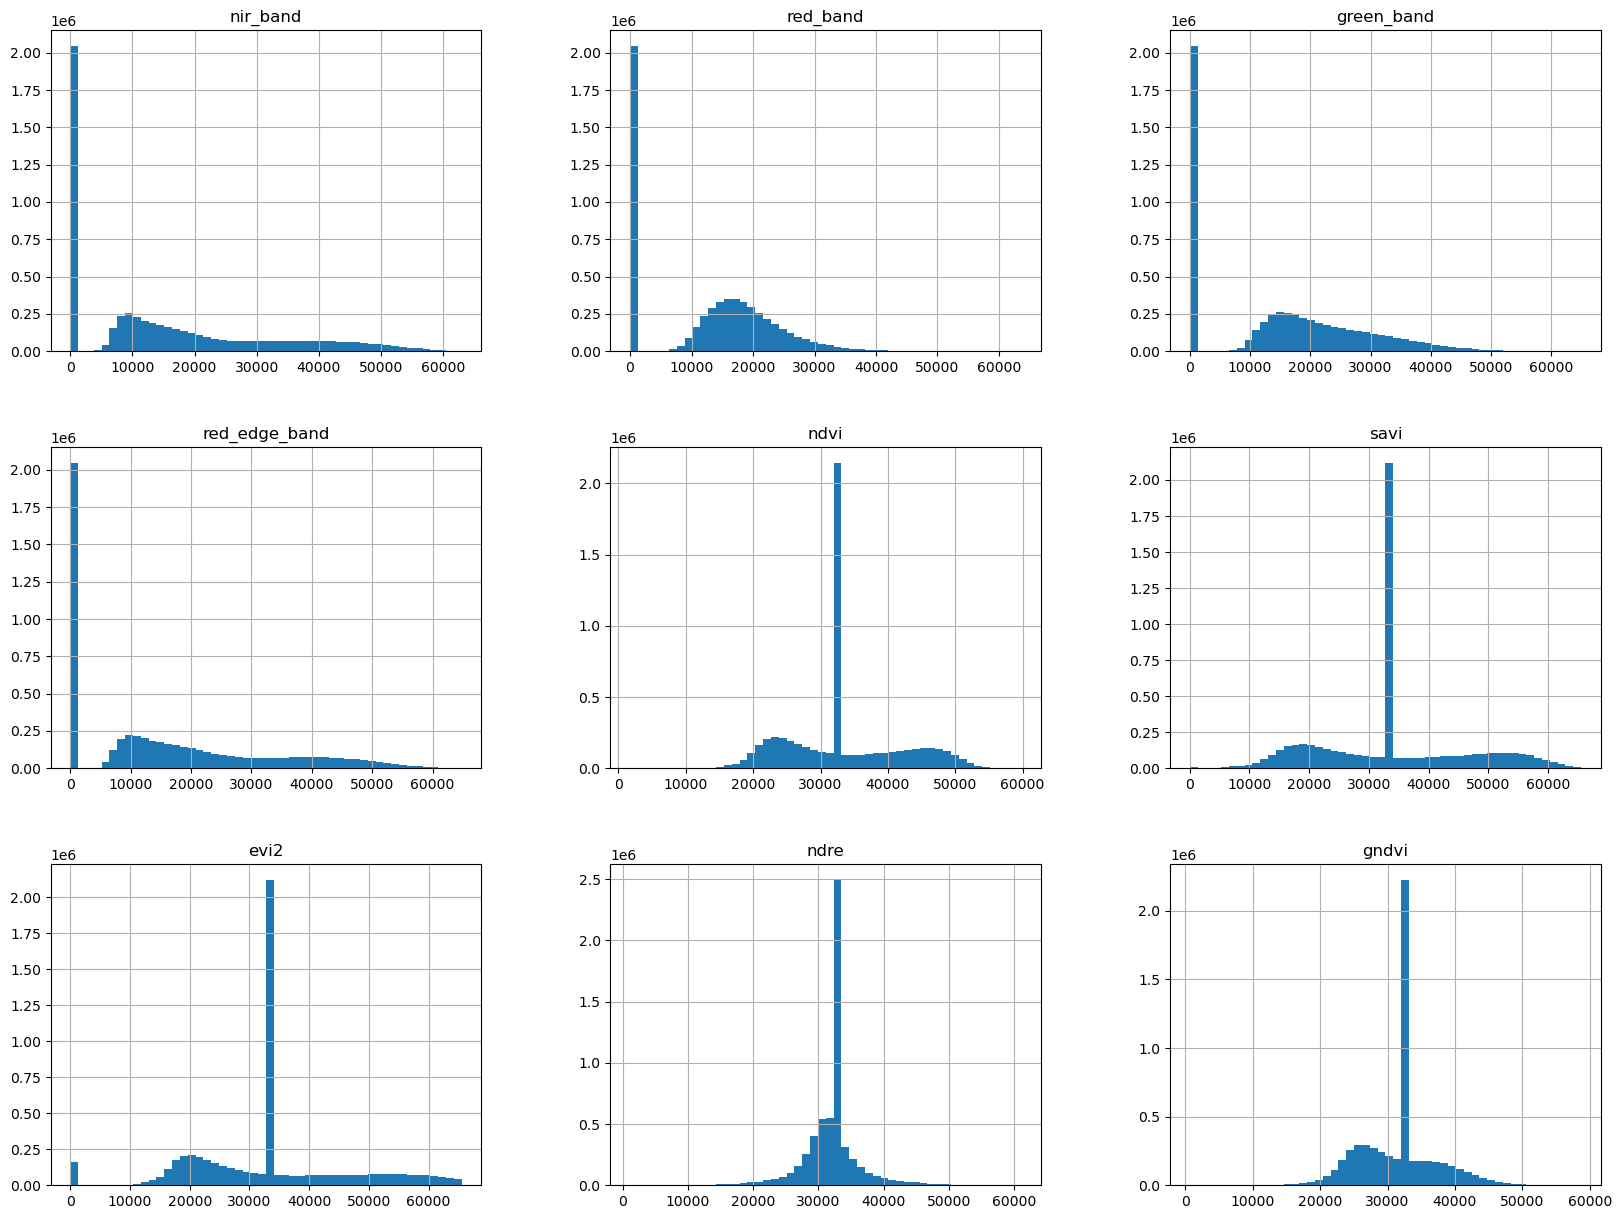

In [18]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [21]:
import numpy as np
from PIL import Image

# Cargar la imagen original
original_image_path = 'imagen_sin_fondo1.tif'
original_image = np.array(Image.open(original_image_path))

# Cargar la imagen segmentada
segmented_image_path = 'segmented_image_result.tif'
segmented_image = np.array(Image.open(segmented_image_path))

# Convertir las imágenes a matrices binarias (0 y 1)
original_binary = np.where(original_image > 0, 1, 0)
segmented_binary = np.where(segmented_image > 0, 1, 0)

# Calcular el Jaccard Index
intersection = np.logical_and(original_binary, segmented_binary).sum()
union = np.logical_or(original_binary, segmented_binary).sum()
jaccard_index = intersection / union

print("Jaccard Index:", jaccard_index)


Jaccard Index: 0.14906220842451695
